In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
#dataload
BRCA1_raw = pd.read_csv("BRCA1_HUMAN_Findlay_2018.csv")

# Domainsplit: BRCA1_raw -> RING & BRCT

In [3]:
#code to split our dataframe into its domains

RING = BRCA1_raw[:575]
BRCT = BRCA1_raw[575:]

# Secondary structure analysis

In [4]:
# add column named: 'position'
df=BRCA1_raw.copy()

import re 

def get_number_from_text(text):
    return re.findall(r'\d{1,4}',text)[0]

df['position']=df['mutant'].apply(get_number_from_text)

In [5]:
# add column containing the newly introduced Aminoacid
test1=df.mutant.str.extract(r'(\d)([ARNDCQEGHILKTMfPOUSTWYV])')
df["new_aa"]=test1[1]

In [6]:
# dataset with only bin0s
df_filtered = df[df['DMS_score_bin'] == 0]

In [7]:
#CHECKING FOR SECONDARY STRUCTURES -> based on Psipred

#Helices:
helices = ['8', '9', '10',"11","12","13","14","15","16","17","18","19","20","21","22","28","29","30","31","41","42","43","44","45","46","47","48","49","50","51","52","70","71","72","73","78","79","80","81","82","83","84","85","86","87","88","89","90","91","92","93","94","95","96","97","1659","1660","1661","1662","1663","1664","1665","1666","1667","1668","1669","1670","1671","1701","1702","1703","1704","1705","1706","1707","1708","1716","1717","1718","1719","1720","1721","1722","1723","1724","1725","1749","1750","1751","1752","1753","1754","1755","1777","1778","1779","1780","1781","1782","1783","1784","1785","1786","1820","1821","1822","1823","1824","1825","1826","1827","1835","1836","1837","1838","1839","1840","1841","1842","1843","1844"]
helices_df = df.loc[df['position'].astype(str).isin(helices)]

#Helices_bin0:
helices_df_bin0 = helices_df.loc[helices_df['DMS_score_bin'] == 0].copy()

#Strands:
strands = ["1650","1651","1652","1653","1654","1674","1675","1676","1677","1684","1685","1686","1687","1688","1689","1712","1713","1714","1715","1765","1766","1767","1768","1769","1807","1808","1809","1810"]
strands_df = df.loc[df['position'].astype(str).isin(strands)]

#Strands_bin0:
strands_df_bin0 = strands_df.loc[strands_df['DMS_score_bin'] == 0].copy()

#Coils (improved technique :D):
df['position'] = df['position'].astype(int)
coils = list(range(1, 8)) + list(range(22, 35)) + list(range(37, 45))+ list(range(55, 67)) + list(range(69, 77)) + list(range(98, 102)) + list(range(1631, 1651))+ list(range(1656, 1660)) + list(range(1673, 1676)) + list(range(1679, 1686)) + list(range(1691, 1702)) + list(range(1710, 1715))+ list(range(1727, 1736))+ list(range(1738, 1753))+ list(range(1757, 1767))+ list(range(1771, 1778))+ list(range(1788, 1791))+ list(range(1794, 1796))+ list(range(1799, 1806))+ list(range(1812, 1821))+ list(range(1829, 1833))+ list(range(1846, 1851))+ list(range(1854, 1865))
coils_df = df.loc[df['position'].isin(coils)]

#Coils_bin0:
coils_df_bin0 = coils_df.loc[coils_df['DMS_score_bin'] == 0].copy()

# Testing for overlaps:
set1 = set(helices)
set2 = set(strands)
set3 = set(coils)

common_elements = set1.intersection(set2, set3)

common_elements_list = list(common_elements)
common_elements_list

#-> no overlaps, yay


[]

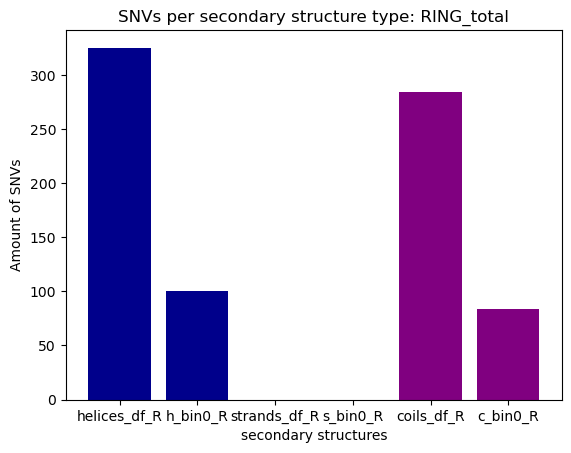

ratio: helices_bin0_R to helices_R: 30.77%
ratio: coils_bin0_R to coils_R: 29.58%


In [22]:
#RING:

#Helices in RING
helices_RING = ['8', '9', '10',"11","12","13","14","15","16","17","18","19","20","21","22","28","29","30","31","41","42","43","44","45","46","47","48","49","50","51","52","70","71","72","73","78","79","80","81","82","83","84","85","86","87","88","89","90","91","92","93","94","95","96","97"]
helices_df_RING = df.loc[df['position'].astype(str).isin(helices_RING)]
helices_df_RING_bin0 = helices_df_RING.loc[helices_df_RING['DMS_score_bin'] == 0].copy()

#strands in RING (there are none)

#coils in RING
df['position'] = df['position'].astype(int)
coils_RING = list(range(1, 8)) + list(range(22, 35)) + list(range(37, 45))+ list(range(55, 67)) + list(range(69, 77)) + list(range(98, 102)) 
coils_df_RING = df.loc[df['position'].isin(coils_RING)]
coils_df_RING_bin0 = coils_df_RING.loc[coils_df_RING['DMS_score_bin'] == 0].copy()

#Barplot + ratios: 
df_counts = [len(helices_df_RING),len(helices_df_RING_bin0),0,0, len(coils_df_RING),len(coils_df_RING_bin0)]
df_names = ['helices_df_R',"h_bin0_R", 'strands_df_R',"s_bin0_R",'coils_df_R',"c_bin0_R"]
colors = ['darkblue', 'darkblue', 'red', 'red', 'purple', 'purple']
plt.bar(df_names, df_counts,color=colors)
plt.xlabel('secondary structures')
plt.ylabel('Amount of SNVs')
plt.title('SNVs per secondary structure type: RING_total')
plt.show()
dataframes = [helices_df_RING, helices_df_RING_bin0, coils_df_RING, coils_df_RING_bin0]
df_names = ['helices_R', 'helices_bin0_R', 'coils_R', 'coils_bin0_R']
ratios = []
for i in range(1, len(dataframes), 2):
    ratio = (len(dataframes[i]) / len(dataframes[i-1])) * 100
    ratios.append(ratio)
for i, ratio in enumerate(ratios):
    print(f"ratio: {df_names[i*2+1]} to {df_names[i*2]}: {ratio:.2f}%")



In [14]:
#Chi2, RING:
#H0: no correlation between the type of secondary structure and how many of its SNVs have a bin_0 score
len_hRING=len(helices_df_RING)
len_hRING0=len(helices_df_RING_bin0)
len_cRING=len(coils_df_RING)
len_cRING0=len(coils_df_RING_bin0)

observed_data_RING = np.array([[len_cRING, len_hRING],[len_cRING0, len_hRING0]])
chi2, p_value, dof, expected = chi2_contingency(observed_data_RING)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print("Expected counts:")
print(expected)

Chi-square statistic: 0.022393889272595308
P-value: 0.8810440090537792
Degrees of freedom: 1
Expected counts:
[[282.61286255 326.38713745]
 [ 85.38713745  98.61286255]]


Since the P-value is >0,05 there is no strong indication to reject the H0 Hypothesis. So in this domain the chances of a SNV leading to a bin_0 score are the same no matter what secondary strucure.

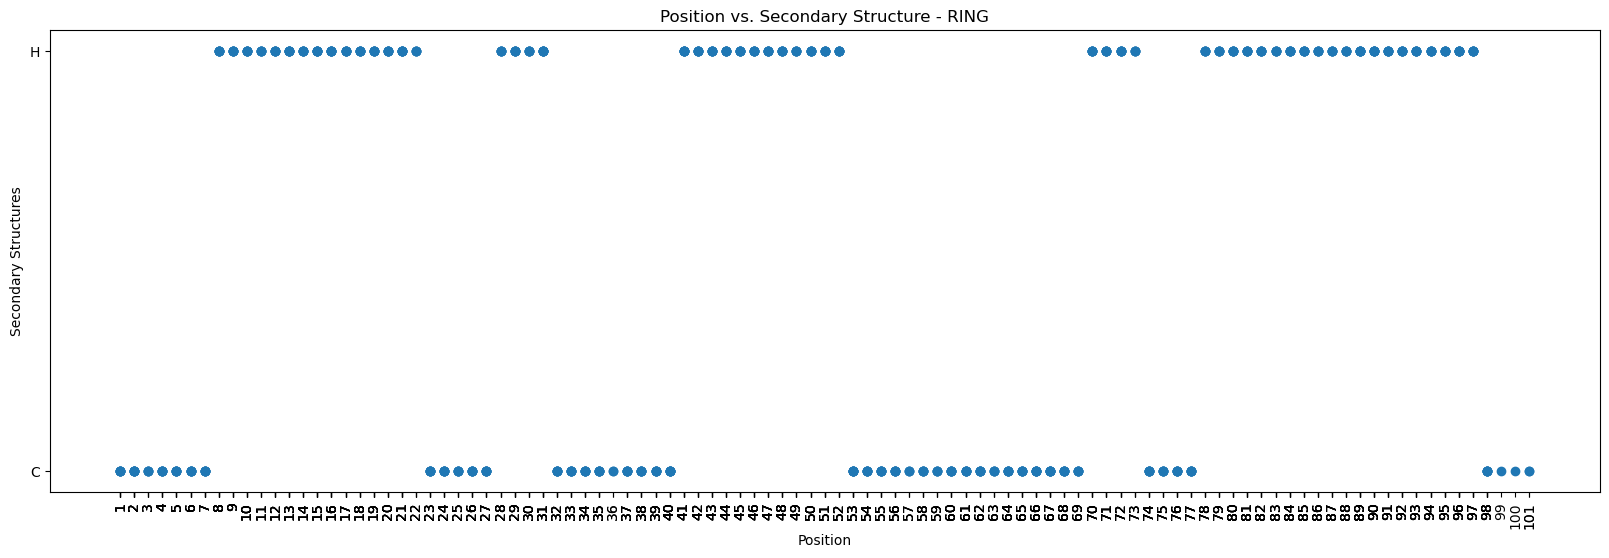

In [15]:
#Vizualizing secondary structures in RING

RING = df[:575]
new_RING = RING.copy()
new_RING['secondary structures'] = RING['position'].apply(lambda x: 'H' if str(x) in helices_RING else 'C')

positions = new_RING['position']
structures = new_RING['secondary structures']

# scatter plot:
plt.scatter(positions, structures)
plt.xticks(positions, rotation='vertical')
plt.xlabel('Position')
plt.ylabel('Secondary Structures')
plt.title('Position vs. Secondary Structure - RING')
fig = plt.gcf()
fig.set_size_inches(20, 6)
plt.show()

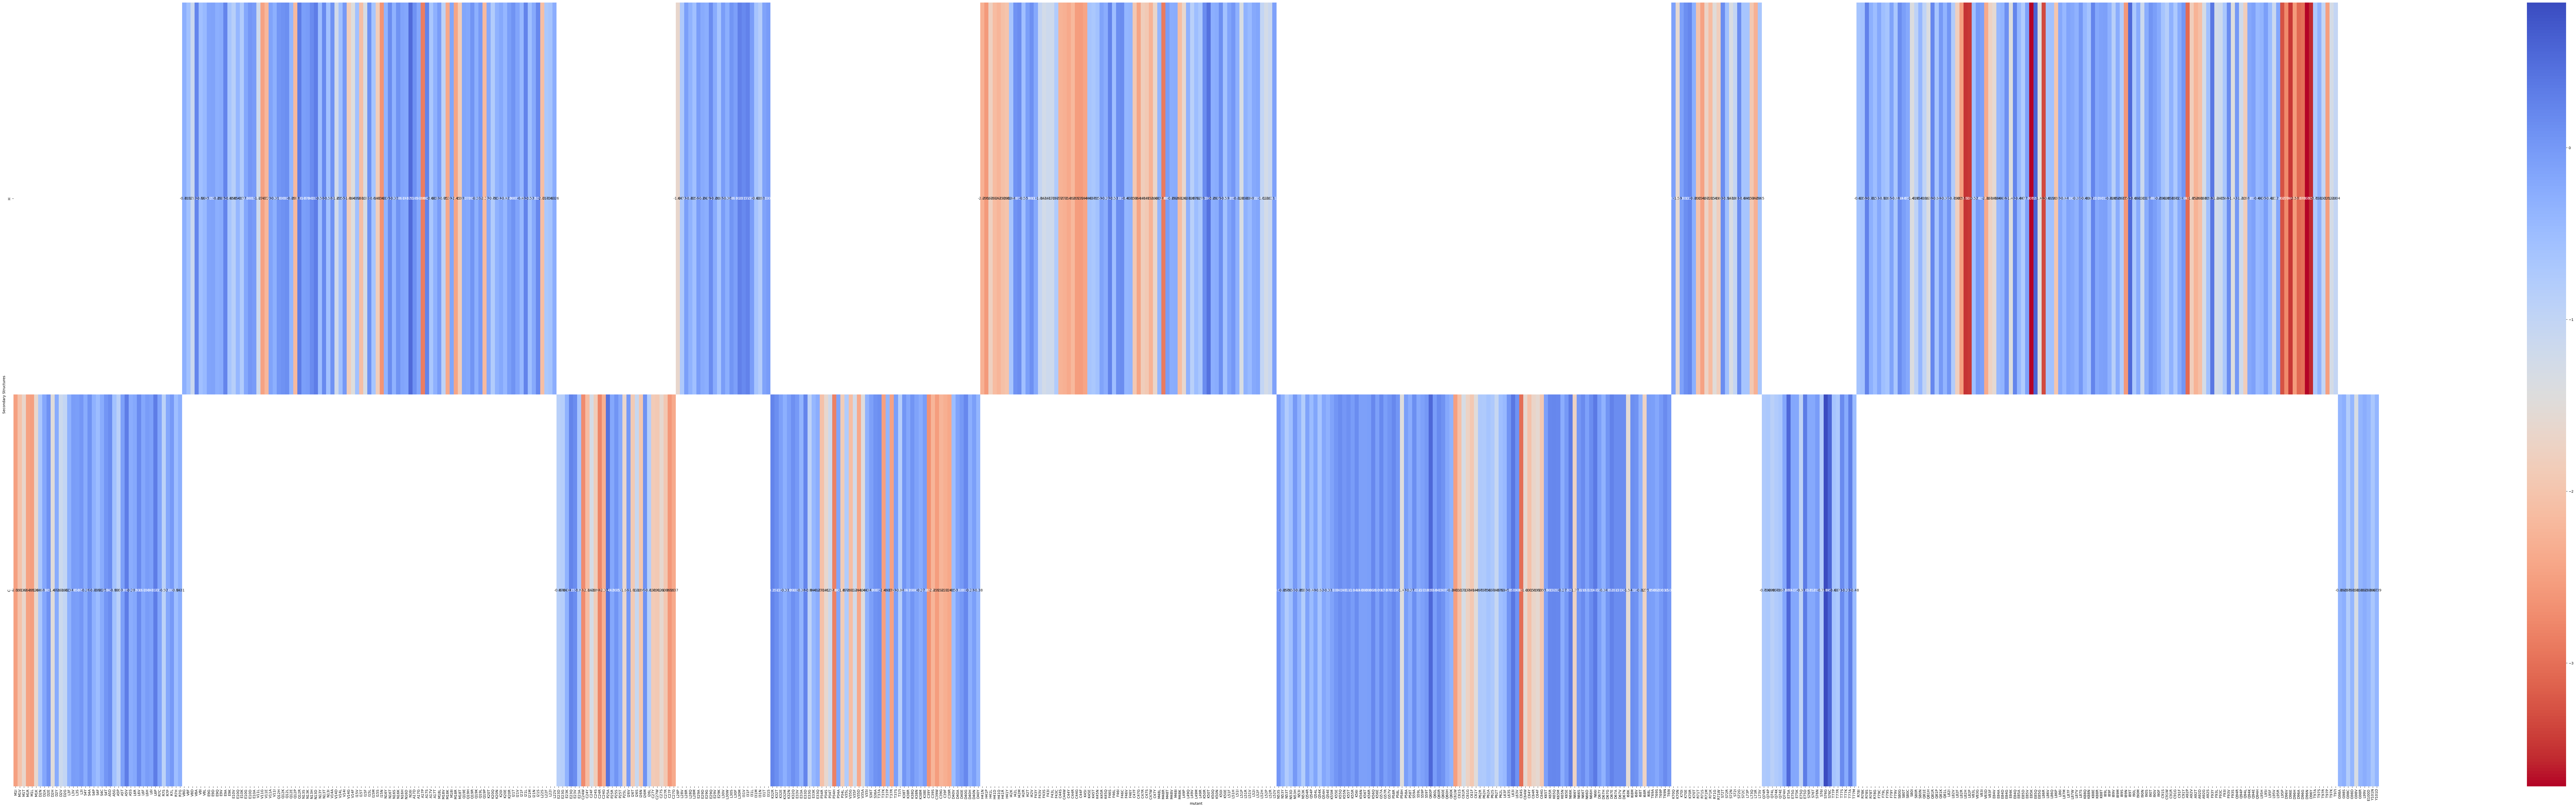

In [16]:
#secondary structure + dms score_RING:
new_RING_agg = new_RING.pivot_table(index='secondary structures', columns='mutant', values='DMS_score')

# Get the order of mutants from the original DataFrame
mutant_order = new_RING['mutant'].unique()

# Reindex the columns of the pivot table to match the desired order
new_RING_agg = new_RING_agg.reindex(index=new_RING_agg.index[::-1],columns=mutant_order)

# Plot creation
plt.figure(figsize=(150, 40)) 

# heatmap
sns.heatmap(new_RING_agg, cmap="coolwarm_r", annot=True, fmt=".2f")
plt.xlabel("mutant")
plt.ylabel("Secondary Structures")
plt.show()




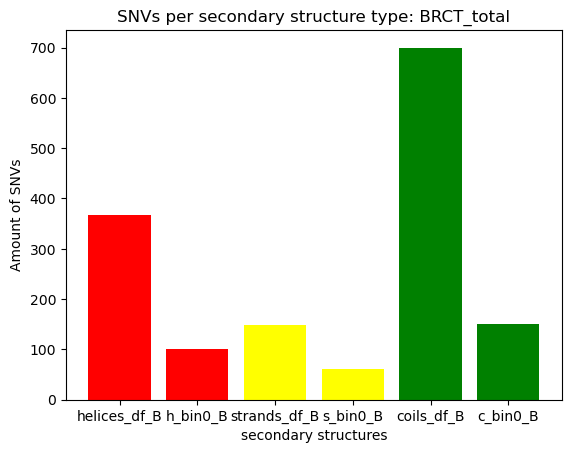

ratio: h_bin0_B to helices_B: 27.45%
ratio: s_bin0_B to strands_B: 40.54%
ratio: coils_bin0_B to coils_B: 21.57%


In [23]:
#BRCT:

#Helices in BRCT
helices_BRCT = ["1659","1660","1661","1662","1663","1664","1665","1666","1667","1668","1669","1670","1671","1701","1702","1703","1704","1705","1706","1707","1708","1716","1717","1718","1719","1720","1721","1722","1723","1724","1725","1749","1750","1751","1752","1753","1754","1755","1777","1778","1779","1780","1781","1782","1783","1784","1785","1786","1820","1821","1822","1823","1824","1825","1826","1827","1835","1836","1837","1838","1839","1840","1841","1842","1843","1844"]
helices_df_BRCT = df.loc[df['position'].astype(str).isin(helices_BRCT)]
helices_df_BRCT_bin0 = helices_df_BRCT.loc[helices_df_BRCT['DMS_score_bin'] == 0].copy()

#strands in BRCT
strands_BRCT = ["1650","1651","1652","1653","1654","1674","1675","1676","1677","1684","1685","1686","1687","1688","1689","1712","1713","1714","1715","1765","1766","1767","1768","1769","1807","1808","1809","1810"]
strands_df_BRCT = df.loc[df['position'].astype(str).isin(strands_BRCT)]
strands_df_BRCT_bin0 = strands_df_BRCT.loc[strands_df_BRCT['DMS_score_bin'] == 0].copy()

#coils in BRCT
df['position'] = df['position'].astype(int)
coils_BRCT = list(range(1631, 1651))+ list(range(1656, 1660)) + list(range(1673, 1676)) + list(range(1679, 1686)) + list(range(1691, 1702)) + list(range(1710, 1715))+ list(range(1727, 1736))+ list(range(1738, 1753))+ list(range(1757, 1767))+ list(range(1771, 1778))+ list(range(1788, 1791))+ list(range(1794, 1796))+ list(range(1799, 1806))+ list(range(1812, 1821))+ list(range(1829, 1833))+ list(range(1846, 1851))+ list(range(1854, 1865)) 
coils_df_BRCT = df.loc[df['position'].isin(coils_BRCT)]
coils_df_BRCT_bin0 = coils_df_BRCT.loc[coils_df_BRCT['DMS_score_bin'] == 0].copy()

#Barplot+ratios:
df_counts = [len(helices_df_BRCT),len(helices_df_BRCT_bin0),len(strands_df_BRCT),len(strands_df_BRCT_bin0), len(coils_df_BRCT),len(coils_df_BRCT_bin0)]
df_names = ['helices_df_B',"h_bin0_B", 'strands_df_B',"s_bin0_B",'coils_df_B',"c_bin0_B"]
colors = ['red', 'red', 'yellow', 'yellow', 'green', 'green']
plt.bar(df_names, df_counts,color=colors)
plt.xlabel('secondary structures')
plt.ylabel('Amount of SNVs')
plt.title('SNVs per secondary structure type: BRCT_total')
plt.show()
dataframes = [helices_df_BRCT, helices_df_BRCT_bin0, strands_df_BRCT,strands_df_BRCT_bin0,coils_df_BRCT, coils_df_BRCT_bin0]
df_names = ['helices_B', 'h_bin0_B',"strands_B","s_bin0_B", 'coils_B', 'coils_bin0_B']
ratios = []
for i in range(1, len(dataframes), 2):
    ratio = (len(dataframes[i]) / len(dataframes[i-1])) * 100
    ratios.append(ratio)
for i, ratio in enumerate(ratios):
    print(f"ratio: {df_names[i*2+1]} to {df_names[i*2]}: {ratio:.2f}%")

In [18]:
#Chi2, BRCT:
#H0: no correlation
len_hBRCT=len(helices_df_BRCT)
len_hBRCT0=len(helices_df_BRCT_bin0)
len_cBRCT=len(coils_df_BRCT)
len_cBRCT0=len(coils_df_BRCT_bin0)
len_sBRCT=len(strands_df_BRCT)
len_sBRCT0=len(strands_df_BRCT_bin0)

observed_data_BRCT = np.array([[len_cBRCT, len_hRING, len_sBRCT],[len_cBRCT0, len_hBRCT0, len_sBRCT0]])
chi2, p_value, dof, expected = chi2_contingency(observed_data_BRCT)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print("Expected counts:")
print(expected)

Chi-square statistic: 15.036107804784002
P-value: 0.0005431886360097251
Degrees of freedom: 2
Expected counts:
[[672.2040404 336.4969697 164.2989899]
 [178.7959596  89.5030303  43.7010101]]


Since the P-value is <0,05 the H0 Hypothesis should be rejected. So in this domain the chances of a SNV leading to a bin_0 score depends on what type of secondary strucure it is a part of.

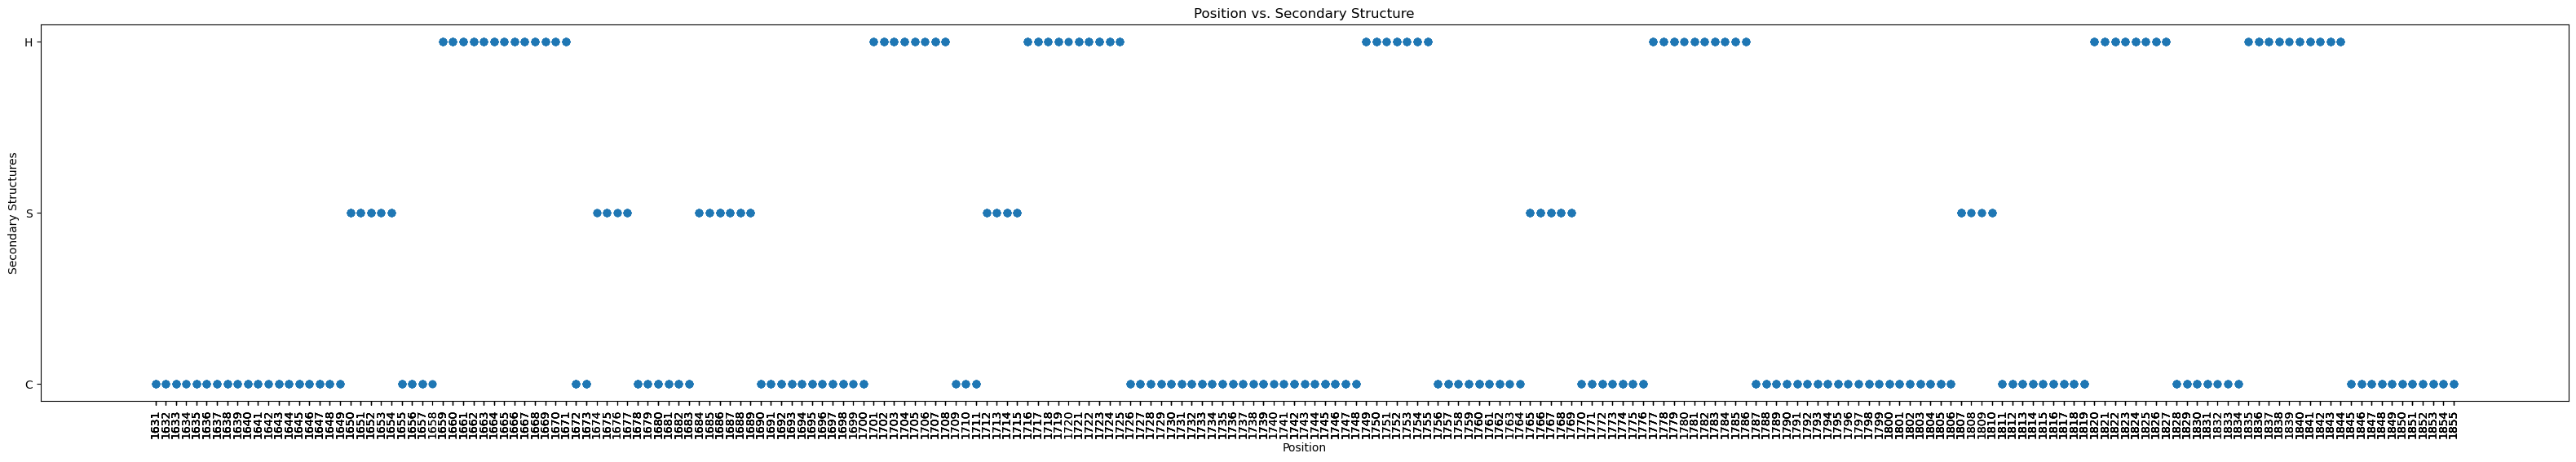

In [19]:
#Vizualizing the secondary structures in BRCT
BRCT = df[575:]
new_BRCT = BRCT.copy()
new_BRCT['secondary structures'] = BRCT['position'].apply(lambda x: 'S' if str(x) in strands_BRCT else ('H' if str(x) in helices_BRCT else'C'))

positions = new_BRCT['position']
structures = new_BRCT['secondary structures']

# scatter plot:
plt.scatter(positions, structures)
plt.xticks(positions, rotation='vertical')
plt.xlabel('Position')
plt.ylabel('Secondary Structures')
plt.title('Position vs. Secondary Structure')
fig = plt.gcf()
fig.set_size_inches(40, 6)
plt.show()




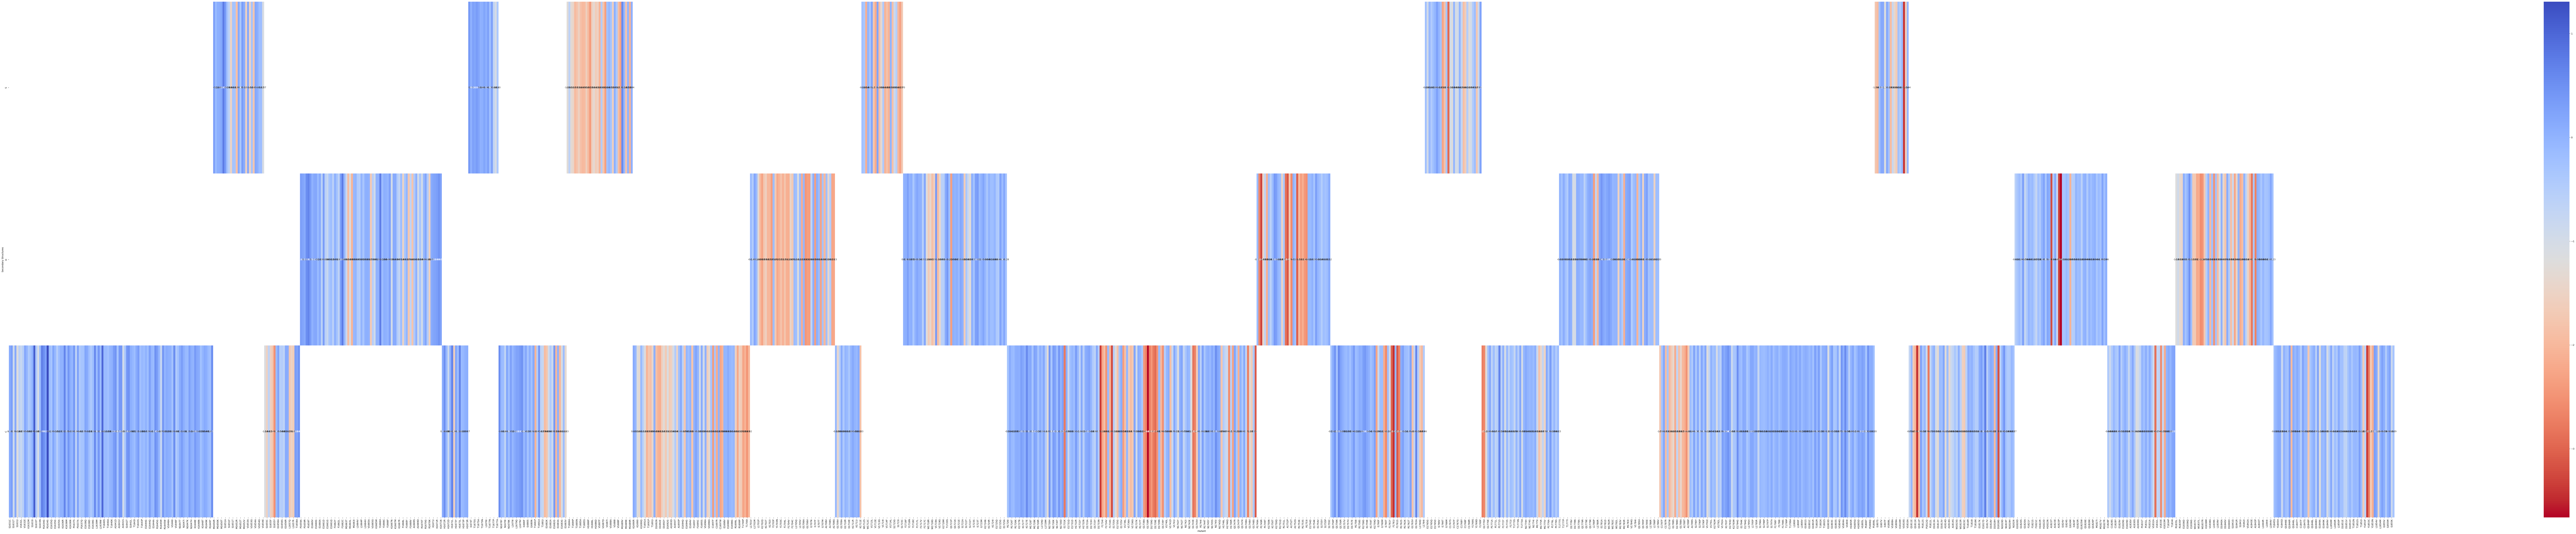

In [20]:
#secondary structures + dms score_BRCT:

# Remove duplicates or aggregate the data
new_BRCT_agg = new_BRCT.pivot_table(index='secondary structures', columns='mutant', values='DMS_score')

# Get the order of mutants from the original DataFrame
mutant_order1 = new_BRCT['mutant'].unique()

# Reindex the columns of the pivot table to match the desired order
new_BRCT_agg = new_BRCT_agg.reindex(index=new_BRCT_agg.index[::-1],columns=mutant_order1)

# Plot creation
plt.figure(figsize=(230, 40))  # Adjust the size of the plot
sns.heatmap(new_BRCT_agg, cmap="coolwarm_r", annot=True, fmt=".2f")
plt.xlabel("mutant")
plt.ylabel("Secondary Structures")
plt.show()